In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/data-portfolio
!git config --global user.email "wheelessbrian@yahoo.com"
!git config --global user.name "bwheeless7"


Mounted at /content/drive
/content/drive/MyDrive/data-portfolio


In [4]:
!mv "/content/drive/MyDrive/Colab Notebooks/01_data_generation_and_eda.ipynb" fraud-risk-intelligence/notebooks

In [5]:
# Create mock transaction dataset

import numpy as np
import pandas as pd

np.random.seed(42)

n = 120_000

data = pd.DataFrame({
    "transaction_id": np.arange(n),
    "customer_id": np.random.randint(10000, 50000, n),
    "amount": np.random.exponential(scale=120, size=n),
    "merchant_risk": np.random.choice(["low", "medium", "high"], p=[0.7, 0.2, 0.1], size=n),
    "device_type": np.random.choice(["mobile", "web", "pos"], p=[0.5, 0.3, 0.2], size=n),
    "country_risk": np.random.choice(["low", "medium", "high"], p=[0.75, 0.15, 0.10], size=n),
    "hour": np.random.randint(0, 24, n),
    "customer_age": np.random.randint(18, 80, n),
    "tenure_months": np.random.randint(1, 120, n),
})

# Fraud logic
risk_score = (
    (data["amount"] > 250).astype(int) +
    (data["merchant_risk"] == "high").astype(int) +
    (data["country_risk"] == "high").astype(int) +
    (data["hour"].isin([0,1,2,3,4])).astype(int) +
    (data["tenure_months"] < 6).astype(int)
)

prob_fraud = 1 / (1 + np.exp(-(risk_score - 2.5)))
data["is_fraud"] = (np.random.rand(n) < prob_fraud).astype(int)

data.head()

,transaction_id,customer_id,amount,merchant_risk,device_type,country_risk,hour,customer_age,tenure_months,is_fraud
0,0,25795,147.683870,low,mobile,high,11,18,12,0
1,1,10860,12.998237,low,pos,low,9,19,41,0
2,2,48158,16.399346,low,web,medium,4,30,27,0
3,3,21284,131.198953,low,pos,low,10,58,94,0
4,4,16265,71.657540,medium,web,low,15,18,17,0


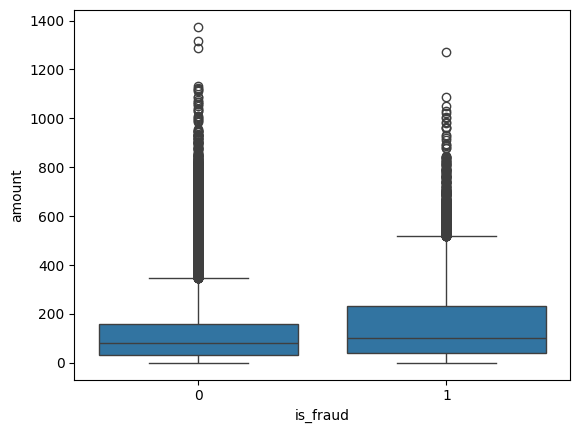

In [6]:
# EDA

data["is_fraud"].value_counts(normalize=True)

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="is_fraud", y="amount", data=data)
plt.show()

### 📊 Transaction Amount vs Fraud Status — Key Insights

The boxplot shows a clear separation between fraudulent and non-fraudulent transactions.

Key observations:
- Fraudulent transactions tend to have **significantly higher amounts** than legitimate ones.
- The upper range of transaction amounts is much wider for fraud, indicating that **large transactions are a strong risk signal**.
- There is still overlap between the two groups, confirming that **transaction amount alone is not sufficient** for fraud detection and that a multivariate model will be required.

These patterns support the design of our fraud detection system and justify the inclusion of transaction amount as a primary predictive feature.


In [7]:
# Save dataset
data.to_csv("/content/drive/MyDrive/data-portfolio/fraud-risk-intelligence/data/fraud_transactions.csv", index=False)